# Propagation Principles in Simple Graphs
We examine graphs that have small vertex-set (up to 20) and have a hub and spoke structure, meaning
they have few hubs and the rest of the vertices tend to be leaves. We first consider graphs with no cycles at all.


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.stats import poisson
from tqdm import tqdm

# plt.ioff()
plt.ion()

################ Functions #######################################
from graphsfunctions import *


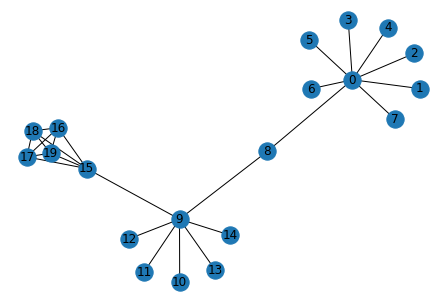

In [2]:
# Testing a little spider graph
G = nx.Graph()
G.add_nodes_from(range(20))
G.add_edges_from([(0, i) for i in range(1, 8)])
G.add_edge(0, 8)
G.add_edge(8, 9)
G.add_edges_from([(9, i) for i in range(10, 15)])
G.add_edge(15, 9)
G.add_edges_from([(i, j) for i in range(15, 19) for j in range(i + 1, 20)])
nx.draw(G, with_labels=True)
plt.show()

The "little Spider" contains a bigger star on 0, connected via 8 to a smaller star on 9, and a K5.
We want to explore its propagation properties.


100%|██████████| 20/20 [00:00<00:00, 779.69it/s]


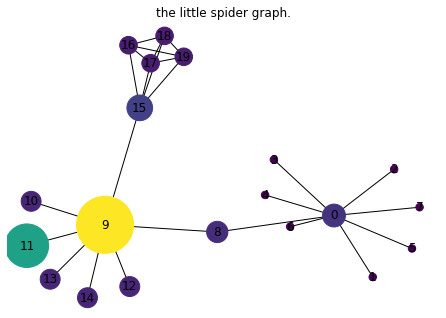

In [3]:
H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
nx.draw(H, with_labels=True, node_color=W85[11], node_size=W85[11]*10000)
plt.title("the little spider graph.")
plt.show()


The plot shows, both by node size as well as by color code, the stationary propagation with biased concentrated on noe 11, with restart probability of 0.15.

100%|██████████| 20/20 [00:00<00:00, 773.36it/s]


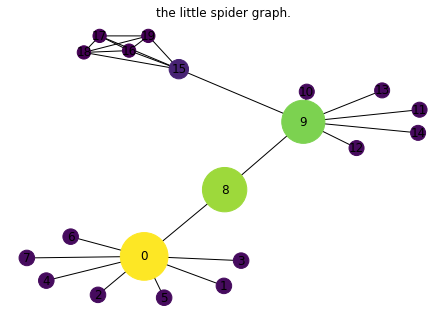

In [4]:
H, W = pageRanksConcentratedBiasG(G, alpha=0.85)
nx.draw(H, with_labels=True, node_color=W[8], node_size=W[8]*10000)
plt.title("the little spider graph.")
plt.show()


This is the same type of plot, but propagation from 8.

Now we are going top demonstrate how the propgation changes from each vertex, and with various alpha values, by way of heatmaps

100%|██████████| 20/20 [00:00<00:00, 1843.81it/s]


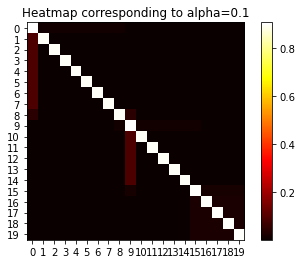

100%|██████████| 20/20 [00:00<00:00, 1640.32it/s]


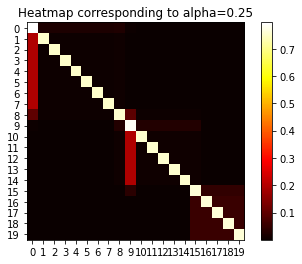

100%|██████████| 20/20 [00:00<00:00, 1613.78it/s]


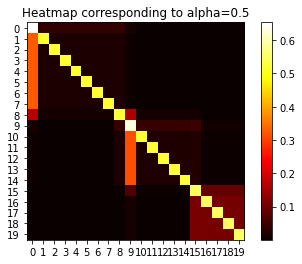

100%|██████████| 20/20 [00:00<00:00, 843.38it/s]


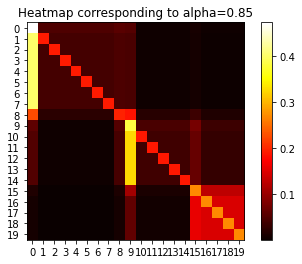

100%|██████████| 20/20 [00:00<00:00, 674.18it/s]


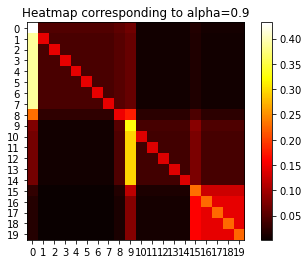

In [5]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.1)
heatmap(W10, "Heatmap corresponding to alpha=0.1")
plt.show()
plt.close()

H, W25 = pageRanksConcentratedBiasG(G, alpha=0.25)
heatmap(W25, "Heatmap corresponding to alpha=0.25")
plt.show()
plt.close()

H, W50 = pageRanksConcentratedBiasG(G, alpha=0.5)
heatmap(W50, "Heatmap corresponding to alpha=0.5")
plt.show()
plt.close()

H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap corresponding to alpha=0.85")
plt.show()
plt.close()

H, W90 = pageRanksConcentratedBiasG(G, alpha=0.9)
heatmap(W90, "Heatmap corresponding to alpha=0.9")
plt.savefig("Heatmap Little Spider alpha=0.9.png")
plt.show()
plt.close()

Interestingly the alpha value doesn't seem to change the structure, but just the instensities. But this graph is very simple. We also note some trivial facts such that hubs retain more heat, and the leaves are cold. Because highly connected nodes receive heat from many sources. If we think in terms of random walk, they are more likely to be visited because they are connected to more nodes. Also notice that node 8 which connects 2 hot hubs is also interesting.

Now lets try the  smae trick with a different dog, I mean graph...

100%|██████████| 20/20 [00:00<00:00, 611.86it/s]


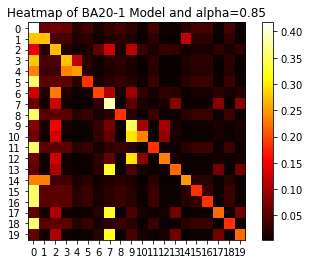

In [6]:
seed = 42
G = nx.barabasi_albert_graph(n=20, m=1, seed=seed)
H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap of BA20-1 Model and alpha=0.85")



100%|██████████| 20/20 [00:00<00:00, 1732.86it/s]


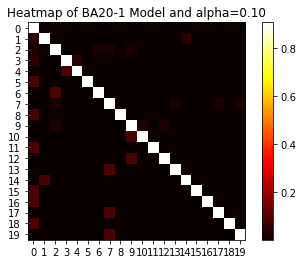

In [7]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.10)
heatmap(W10, "Heatmap of BA20-1 Model and alpha=0.10")


100%|██████████| 20/20 [00:00<00:00, 525.26it/s]


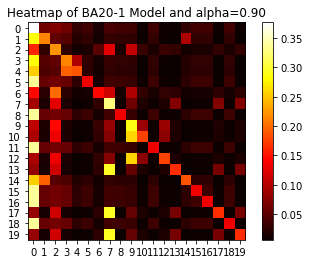

In [8]:
H, W90 = pageRanksConcentratedBiasG(G, alpha=0.90)
heatmap(W90, "Heatmap of BA20-1 Model and alpha=0.90")


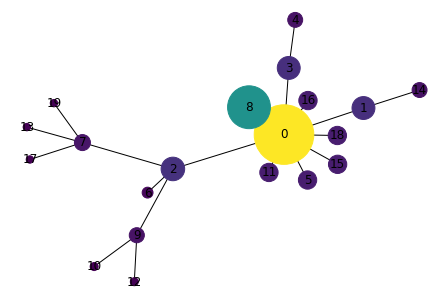

In [9]:
nx.draw(H, with_labels=True, node_color=W85[8], node_size=W85[8]*10000)


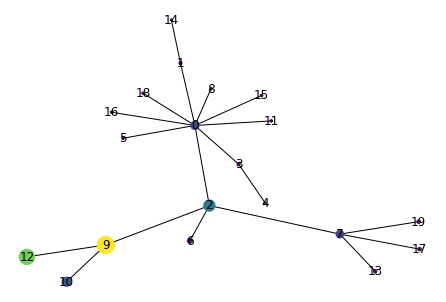

In [10]:
nx.draw(H, with_labels=True, node_color=W85[12], node_size=W85[12]*1000)


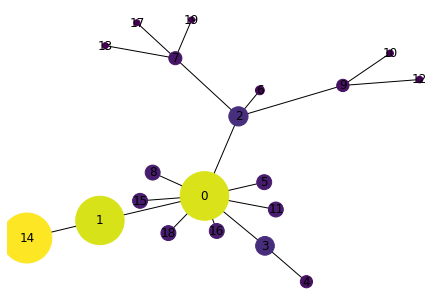

In [11]:
nx.draw(H, with_labels=True, node_color=W85[14], node_size=W85[14]*10000)


Now we do they same experiment with a more complex graph...

100%|██████████| 25/25 [00:00<00:00, 836.94it/s]


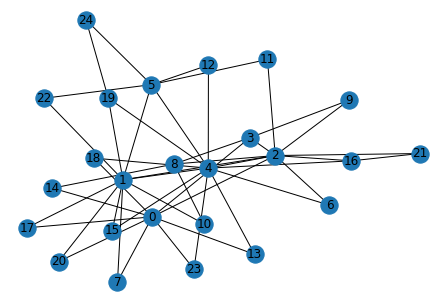

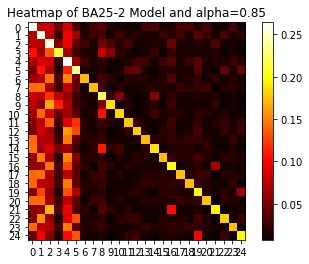

In [12]:
seed = 42
G = nx.barabasi_albert_graph(n=25, m=2, seed=seed)

nx.draw(G, with_labels=True)

H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap of BA25-2 Model and alpha=0.85")


100%|██████████| 25/25 [00:00<00:00, 1297.00it/s]


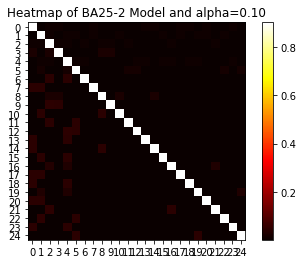

In [13]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.10)
heatmap(W10, "Heatmap of BA25-2 Model and alpha=0.10")


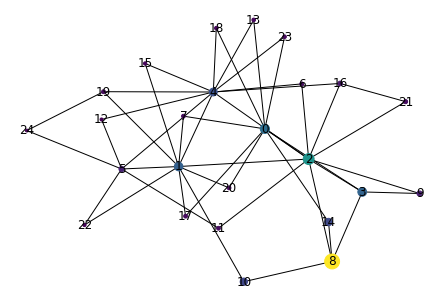

In [14]:
nx.draw(H, with_labels=True, node_color=W85[8], node_size=W85[8]*1000)


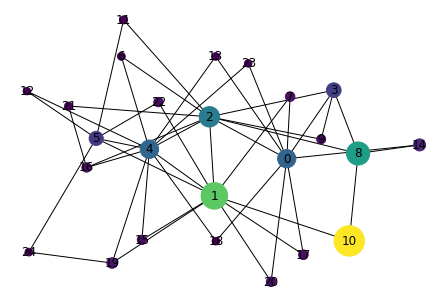

In [15]:
nx.draw(H, with_labels=True, node_color=W85[10], node_size=W85[10]*5000)


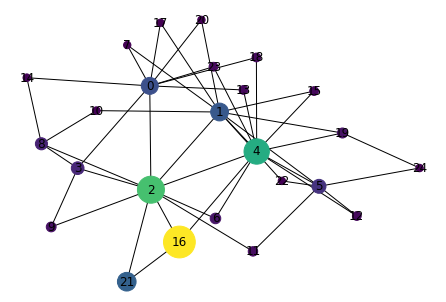

In [16]:
nx.draw(H, with_labels=True, node_color=W85[16], node_size=W85[16]*5000)


I think it is clear now  that propagation strongly depends on the distance from the propagating source and on the degree...

Next we are going to see what the influence graph looks like. The influence of node i on j is pi[j] where pi is the stationary distribution propagated from i (so we look at the j component of it).

The influence graph is a weighted graph on n nodes. where the edge weight of (i,j) is min(pi[j], pj[i]).
We also set a threshold $\delta$ so we only edges that weigh over delta make the cut.


100%|██████████| 25/25 [00:00<00:00, 852.51it/s]


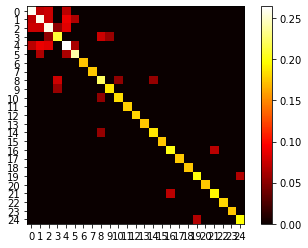

In [17]:
# reducedInfluenceMatrixG
W = reducedInfluenceMatrixG(G, delta=0.05)

heatmap(W, "")




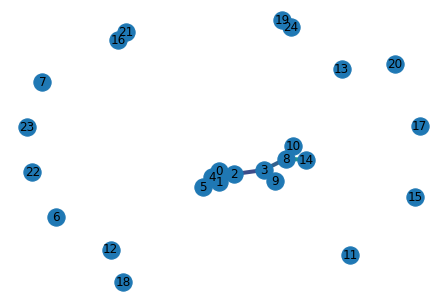

In [18]:
Gd = nx.Graph()
Gd.add_nodes_from(range(25))
edges = [(i,j) for i in range(25) for j in range(i,25) if W[i,j]>0]
Gd.add_edges_from(edges)
l = [W[e] for e in Gd.edges()]
l


nx.draw(Gd, with_labels=True, width=4, edge_color = range(40))
plt.show()

# Exploring graph clustering methods. 
Since we are dealing with propagation and interested in connected scale free
graphs such as Barabsi-Albert, I am trying to apply propagation to perform
this task. 
Idea 1: The hottest node is going to form the first cluster. We then extend it
by all nodes that are connected to it in a sufficiently hot path. Remove them
from the graph and repeat on the smaller graph. Thought should then be
dedicated to the matter of setting the parameters: what is 'hot' (delta), how
fast we propagate (alpha), how do we test statistical significance and
robustness. Define null model? Use connected edge swaps for robustness tests?


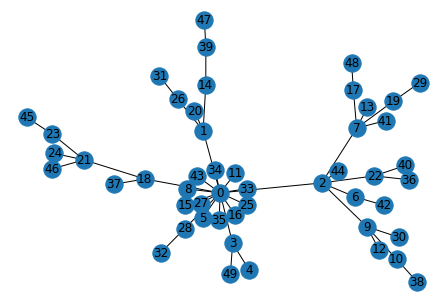

In [19]:
G = nx.barabasi_albert_graph(n=50, m=1, seed=seed)

nx.draw(G, with_labels=True)


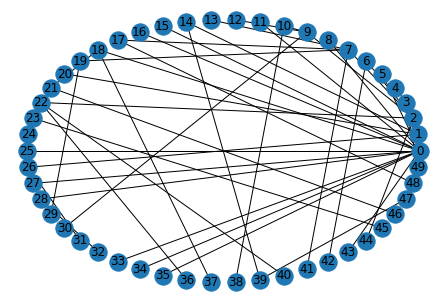

In [20]:
nx.draw_circular(G, with_labels=True)

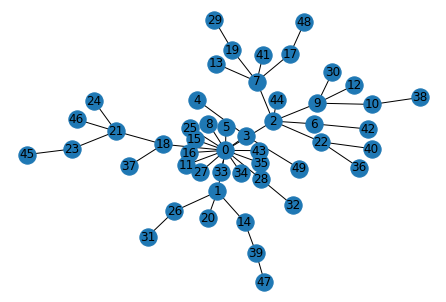

In [21]:
nx.draw_kamada_kawai(G, with_labels=True)

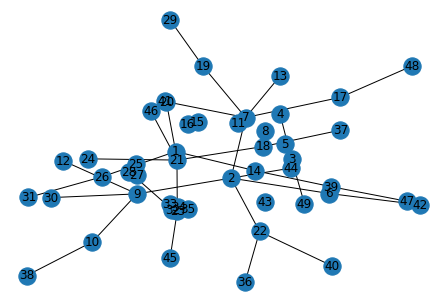

In [22]:
G.remove_node(0)

nx.draw_kamada_kawai(G, with_labels=True)

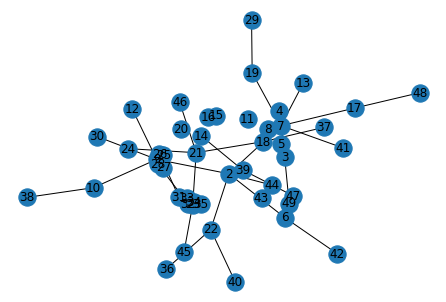

In [23]:
G.remove_node(1)

nx.draw_kamada_kawai(G, with_labels=True)

<BarContainer object of 50 artists>

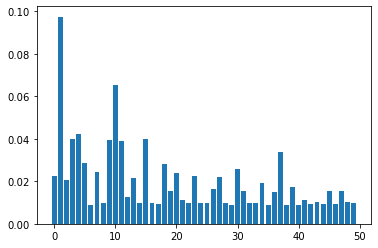

In [24]:
# trying to cluster a graph ...
G = nx.dual_barabasi_albert_graph(n=50, m1=1, m2=2, p=0.7, seed=seed)
H = G.copy()
p, _ = powerIterateG(G, alpha=0.85)
plt.bar(range(50), p)


100%|██████████| 50/50 [00:00<00:00, 844.25it/s]


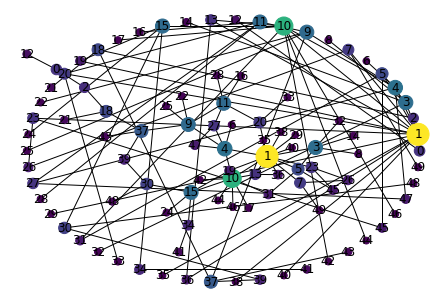

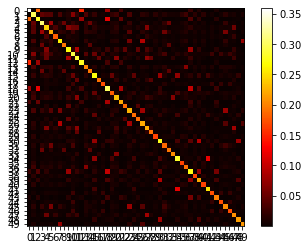

In [25]:
nx.draw_kamada_kawai(G, with_labels=True, node_color=p, node_size=5000*p)

nx.draw_circular(G, with_labels=True, node_color=p, node_size=5000*p)

s = np.argmax(p)
s

W = reducedInfluenceMatrixG(G, delta=0)
heatmap(W, "")


In [26]:
H = nx.Graph()
H.add_nodes_from(G.nodes())

edges = [(i,j) for i in range(49) for j in range(i+1,50) if W[i,j]>0]

H.add_edges_from(edges)

nx.draw_circular(H, with_labels=True, node_color=p, node_size=5000*p)


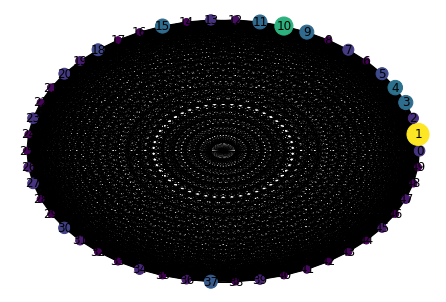

In [27]:
plt.show()

In [28]:
for delta in np.arange(0.01, 1, 0.01):
    remlist = [e for e in list(H.edges()) if W[e] <= delta]
    H.remove_edges_from(remlist)
    if nx.number_connected_components(H) > 1:
        print("break", len(H.edges()))
        break

len(H.edges())


break 120


120

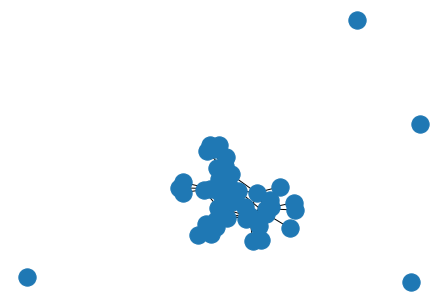

In [29]:
nx.draw(H)
plt.show()

In [30]:
# so that method is not very promicing because it tends to prune leaves and concerve one giant connected component

In [31]:
# We shall now try bottom up method. start from a totally disconnected graph. Pick the remaining coldest node and connect it to its nearest
# neighbor in the symmetric influence graph

29 29
34 35
36 38
37 40
6 6
16 17
36 42
37 44
38 46
15 16
25 28
19 22
21 25
20 24
25 33
7 8
12 14
22 32
31 49
27 43
29 48
16 21
25 41
10 12
21 36
24 47
19 31
22 45
13 19
15 26
19 39
17 34
2 2
9 13
13 27
0 0
11 23
10 20
4 7
9 30
8 18
3 5
7 37
5 11
3 9
4 15
1 3


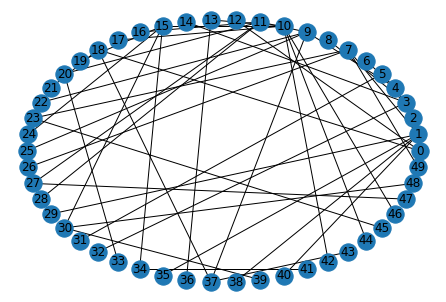

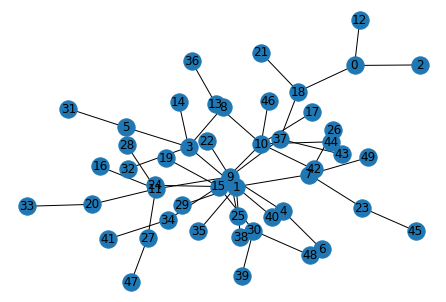

In [32]:
H = nx.Graph()
H.add_nodes_from(G.nodes())
nlist = list(H.nodes())
while nx.number_connected_components(H) > 3:
    s = np.argmin(p[nlist])
    x = nlist[s]
    print(s,x)
    nlist.pop(s)
    t = np.argmax([W[x,i] for i in nlist])
    H.add_edge(x,nlist[t])

nx.draw_circular(H, with_labels=True )
plt.show()

nx.number_connected_components(H)

nx.draw_kamada_kawai(H, with_labels=True)
plt.show()



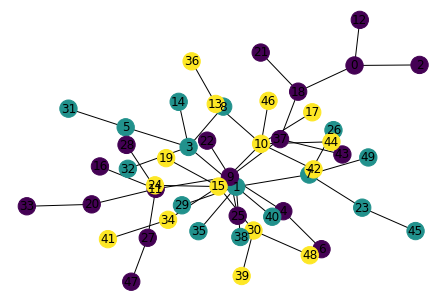

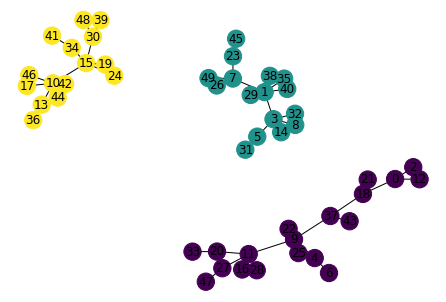

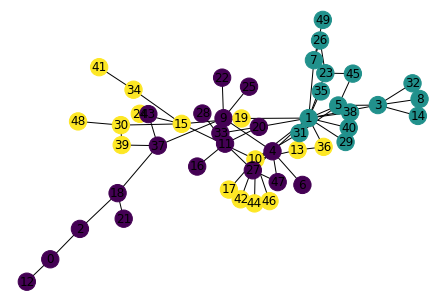

In [33]:
CCs = [list(c) for c in nx.connected_components(H)]

CCs

colors = np.zeros(50)
colors[CCs[1]]=1
colors[CCs[2]]=2


nx.draw_kamada_kawai(H, with_labels=True, node_color=colors)
plt.show()

nx.draw_spring(H, with_labels=True, node_color=colors)
plt.show()

nx.draw_spring(G, with_labels=True, node_color=colors)
plt.show()

In [ ]:
# The 2 upper plots show the clustering on the influence matrix/graph the bottom one show the same clustering on the original graph